# Vou mostrar aqui os retornos anuais dos índices IMA da Anbima usando dados do BACEN pelo Quandl:

# Primeiro importamos os módulos necessários: 

In [12]:
import quandl as qd
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas_datareader import data as dt

# Importamos do Quandl o IMA-B, IMA-B-5 e IMA-G:

In [14]:
# Configurando a minha key da API do Quandl:
qd.ApiConfig.api_key = key

ima_b = quandl.get("BCB/12466").pct_change()
ima_b_retornos_anuais = ((ima_b.add(1).cumprod()).groupby([ima_b.index.year,ima_b.index.year]).tail(1)).pct_change()

ima_b_5 = quandl.get("BCB/12467").pct_change()
ima_b_5_retornos_anuais = ((ima_b_5.add(1).cumprod()).groupby([ima_b_5.index.year,ima_b_5.index.year]).tail(1)).pct_change()

ima_g = quandl.get("BCB/12469").pct_change()
ima_g_retornos_anuais = ((ima_g.add(1).cumprod()).groupby([ima_g.index.year,ima_g.index.year]).tail(1)).pct_change()

# Criamos um dataframe com os retornos anuais de 2010-2020: 

In [15]:
# INSERINDO OS DADOS TODOS EM UM DATAFRAME:
IMA = pd.DataFrame()
IMA['IMA-B']=ima_b_retornos_anuais['Value']
IMA['IMA-B-5']=ima_b_5_retornos_anuais['Value']
IMA['IMA-G']=ima_g_retornos_anuais['Value']

#PEGAMOS APENAS DE 2010-2020:
IMA_2010_2020 = IMA[6:].set_index(IMA[6:].index.year)

#CALCULAMOS O RETORNO ACUMULADO DE CADA UM E INSERIMOS EM UMA LISTA:
retorno_acumulado = [(IMA_2010_2020.add(1).cumprod().tail(1)-1).iloc[0,0],(IMA_2010_2020.add(1).cumprod()
                    .tail(1)-1).iloc[0,1],(IMA_2010_2020.add(1).cumprod().tail(1)-1).iloc[0,2]]

#ADICIONAMOS UMA LINHA COM OS RETORNOS ACUMULADOS NO DATA FRAME: 
IMA_2010_2020.loc['ACUMULADO'] = retorno_acumulado

#CALCULAMOS O CAGR DE CADA UM E INSERIMOS UMA NOVA LINHA COM ELES: 
IMA_2010_2020.loc['CAGR']=(IMA_2010_2020.loc['ACUMULADO'].add(1))**0.1-1

display(IMA_2010_2020*100)

,IMA-B,IMA-B-5,IMA-G
Date,,,
2010,17.044162,13.035047,12.979868
2011,15.108249,15.687908,13.652460
2012,26.677119,16.983996,17.732088
2013,-10.018041,2.777648,-1.424773
2014,14.543824,11.641467,12.357802
2015,8.881532,15.457013,9.317609
2016,24.810604,15.481511,20.995005
2017,12.794069,12.577699,12.818142
2018,13.058738,9.865486,10.034835


# Agora vamos plotar um gráfico comparando os IMA's o IBOV e o CDI:

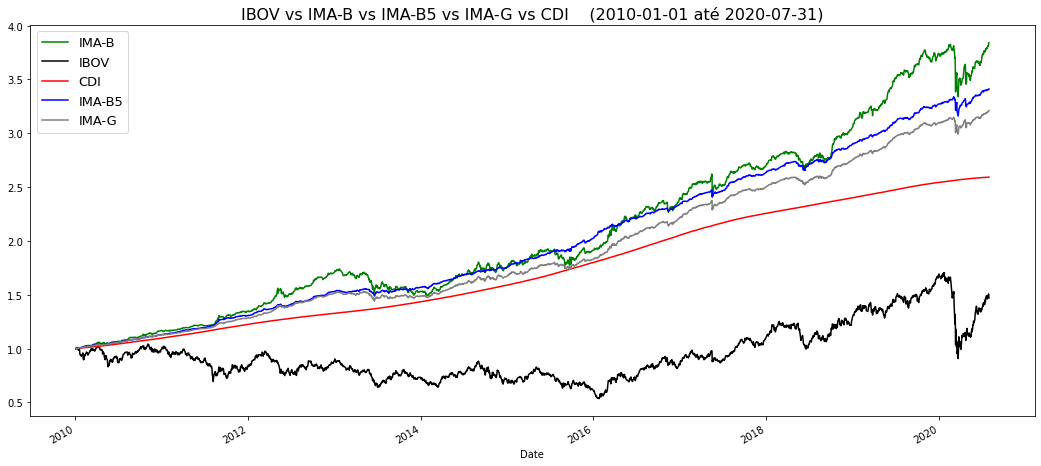

In [18]:
# DEFININDO O INÍCIO DO PERÍODO PARA PLOTAR:  
inicio = '2010-01-01'

# CDI: 
cdi = (qd.get('BCB/12',start_date=inicio)/100).add(1).cumprod().rename(columns={'Value':'CDI'})

# IMA-B:
imab = qd.get("BCB/12466",start_date=inicio).rename(columns={'Value':'IMA-B'})

# IMA-B5:
imab5 = qd.get("BCB/12467",start_date=inicio).rename(columns={'Value':'IMA-B5'})

# IMA-G:
imag = qd.get("BCB/12469",start_date=inicio).rename(columns={'Value':'IMA-G'})

# IBOV:
ibov = dt.DataReader('^BVSP',data_source='yahoo',start=inicio).rename(columns={'Adj Close':'IBOV'})['IBOV']

# CONCATENANDO TUDO EM UM DATAFRAME:
data = pd.concat([imab,ibov,cdi,imab5,imag],axis=1).dropna()

# PLOTANDO TUDO: 
(data['IMA-B']/data['IMA-B'].iloc[0]).plot(figsize=(18,8),label='IMA-B',c='green')
(data['IBOV']/data['IBOV'].iloc[0]).plot(figsize=(18,8),label='IBOV',c='black')
(data['CDI']/data['CDI'].iloc[0]).plot(figsize=(18,8),label='CDI',c='red')
(data['IMA-B5']/data['IMA-B5'].iloc[0]).plot(figsize=(18,8),label='IMA-B5',c='blue')
(data['IMA-G']/data['IMA-G'].iloc[0]).plot(figsize=(18,8),label='IMA-G',c='grey')
plt.legend(loc='upper left',fontsize=13)
plt.title('IBOV vs IMA-B vs IMA-B5 vs IMA-G vs CDI    '+'('+inicio+' até '+'2020-07-31)',fontsize=16)
plt.show()